In [64]:
library(tidyr)
library(dplyr)
library(corrplot)


lifeData_original <- read.csv("C:/Code/BIOSTAT682/Life Expectancy.csv")

countries_to_drop = c("Equatorial Guinea", "Haiti")  # they only have predict data, no training data
lifeData_full <- lifeData_original %>% drop_na() %>% filter(!Country %in% countries_to_drop)
dim(lifeData_original)
dim(lifeData_full)

head(lifeData_full)

[1] 2938   22

[1] 1646   22

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness.1.19.years.,thinness.5.9.years.,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [65]:
lifeData_train <- lifeData_full %>% filter(Year < 2013)
lifeData_test <- lifeData_full %>% filter(Year >= 2013)
dim(lifeData_train)
dim(lifeData_test)

[1] 1386   22

[1] 260  22

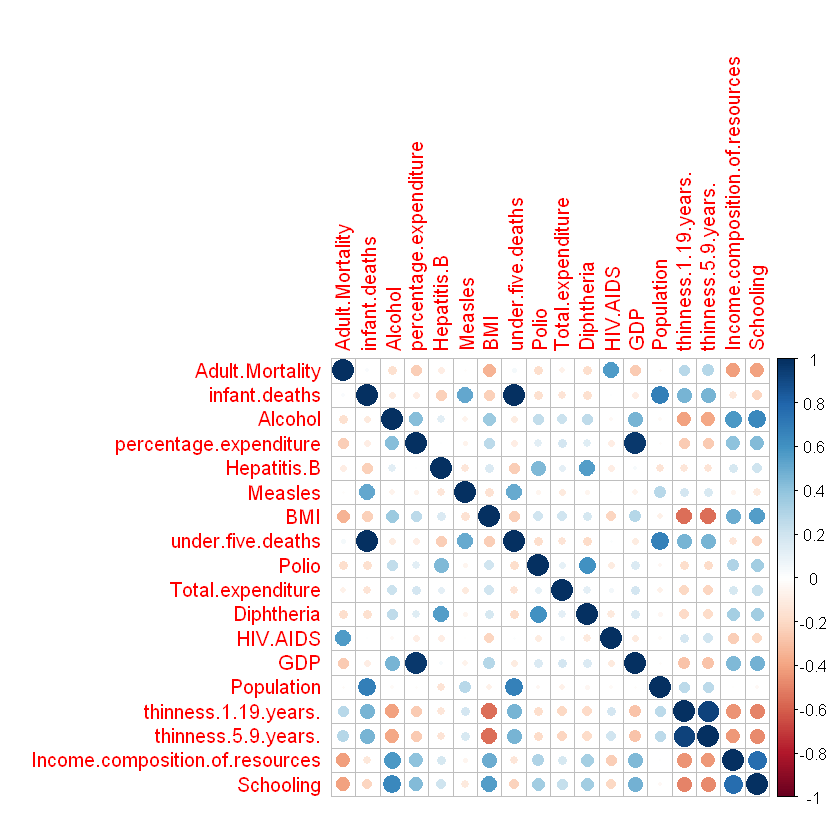

In [66]:
lifeData_train.matrix <- as.matrix(lifeData_train)[,-(1:4)]
lifeData_train.matrix <- apply(lifeData_train.matrix, 2, as.numeric)
corrplot(cor(lifeData_train.matrix))

# Least Square

In [67]:
lmod.full <- lm(Life.expectancy ~ ., data = lifeData_train[,-2])
summary(lmod.full)


Call:
lm(formula = Life.expectancy ~ ., data = lifeData_train[, -2])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9563 -0.8061 -0.1140  0.4238  7.3416 

Coefficients: (1 not defined because of singularities)
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      4.901e+01  1.045e+00  46.887  < 2e-16 ***
CountryAlbania                   1.278e+01  9.134e-01  13.990  < 2e-16 ***
CountryAlgeria                   1.053e+01  9.053e-01  11.635  < 2e-16 ***
CountryAngola                   -6.075e+00  9.610e-01  -6.321 3.61e-10 ***
CountryArgentina                 9.112e+00  1.084e+00   8.408  < 2e-16 ***
CountryArmenia                   1.133e+01  8.897e-01  12.734  < 2e-16 ***
CountryAustralia                 1.230e+01  1.254e+00   9.809  < 2e-16 ***
CountryAustria                   1.625e+01  1.129e+00  14.387  < 2e-16 ***
CountryAzerbaijan                9.277e+00  8.865e-01  10.465  < 2e-16 ***
CountryBangladesh             

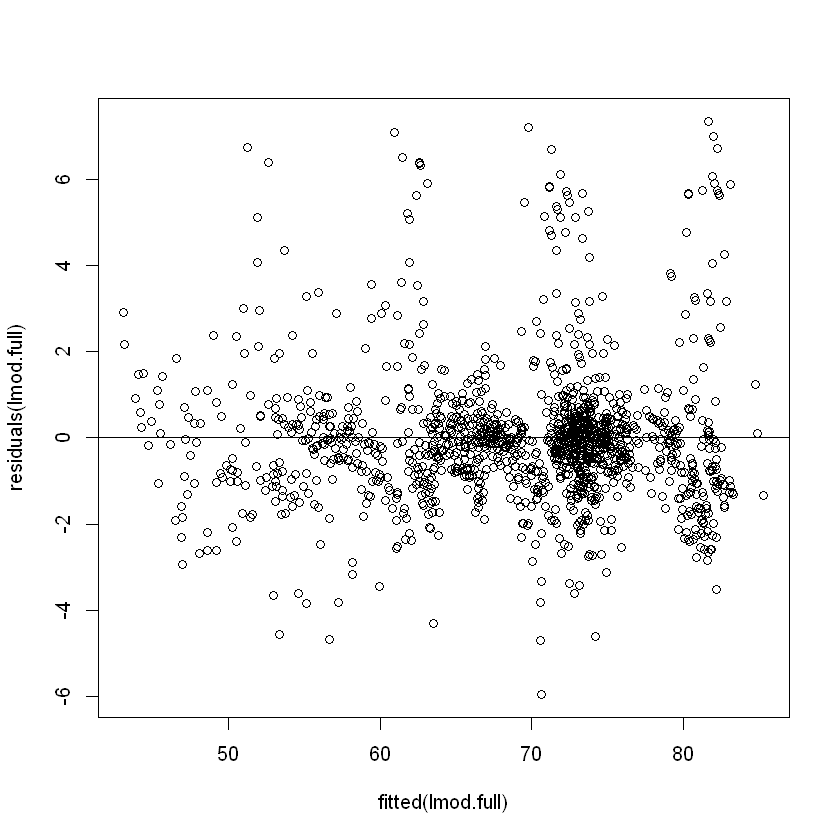

In [68]:
plot(fitted(lmod.full), residuals(lmod.full))
abline(h = 0)

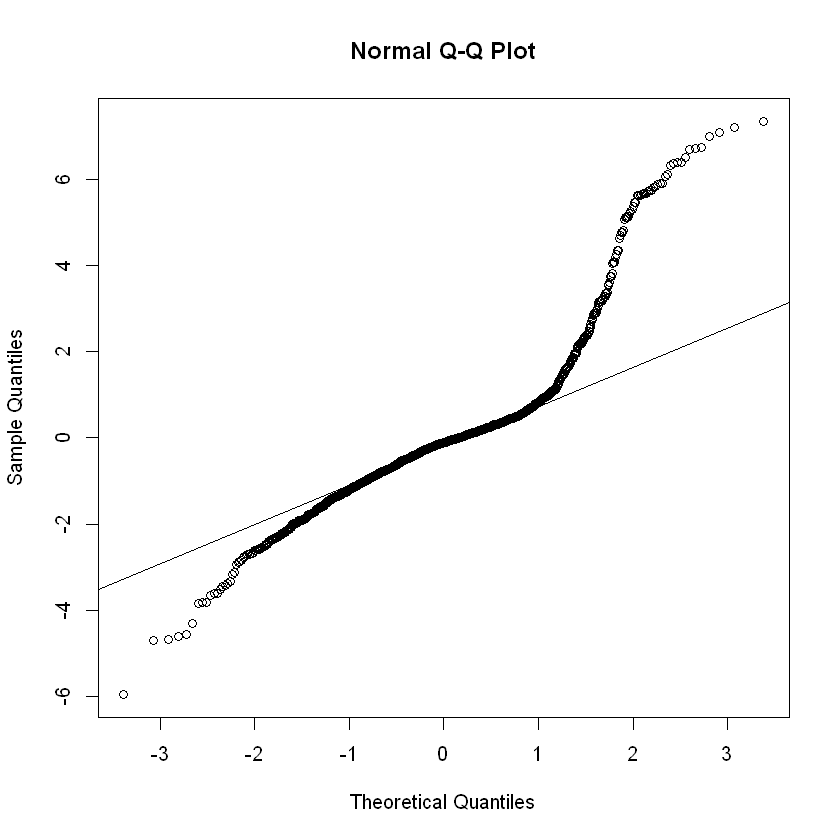

In [69]:
qqnorm(residuals(lmod.full))
qqline(residuals(lmod.full))

In [70]:
step(lmod.full, trace = 0)


Call:
lm(formula = Life.expectancy ~ Country + infant.deaths + Alcohol + 
    Hepatitis.B + under.five.deaths + HIV.AIDS + GDP + thinness.5.9.years. + 
    Income.composition.of.resources + Schooling, data = lifeData_train[, 
    -2])

Coefficients:
                    (Intercept)                   CountryAlbania  
                      4.849e+01                        1.291e+01  
                 CountryAlgeria                    CountryAngola  
                      1.071e+01                       -6.036e+00  
               CountryArgentina                   CountryArmenia  
                      9.103e+00                        1.148e+01  
               CountryAustralia                   CountryAustria  
                      1.204e+01                        1.627e+01  
              CountryAzerbaijan                CountryBangladesh  
                      9.462e+00                        1.127e+01  
                 CountryBelarus                   CountryBelgium  
            

# Ridge regression

In [71]:
library(MASS)
lifeData_train_ridge <- lifeData_train
lifeData_train_ridge$Status <- rep(0, nrow(lifeData_train))
for (i in 1:nrow(lifeData_full_ridge)) {
    lifeData_train_ridge$Status <- ifelse(lifeData_train$Status == 'Developing', 0, 1)
}
lifeData_test_ridge <- lifeData_test
lifeData_test_ridge$Status <- rep(0, nrow(lifeData_test))
for (i in 1:nrow(lifeData_full_ridge)) {
    lifeData_test_ridge$Status <- ifelse(lifeData_test$Status == 'Developing', 0, 1)
}
ridgemod <- lm.ridge(Life.expectancy ~ . - Country - Year, lambda = seq(0, 1, 1e-3), data = lifeData_train_ridge)
select(ridgemod)

modified HKB estimator is 0.7160818 
modified L-W estimator is 3.315348 
smallest value of GCV  at 0.055 


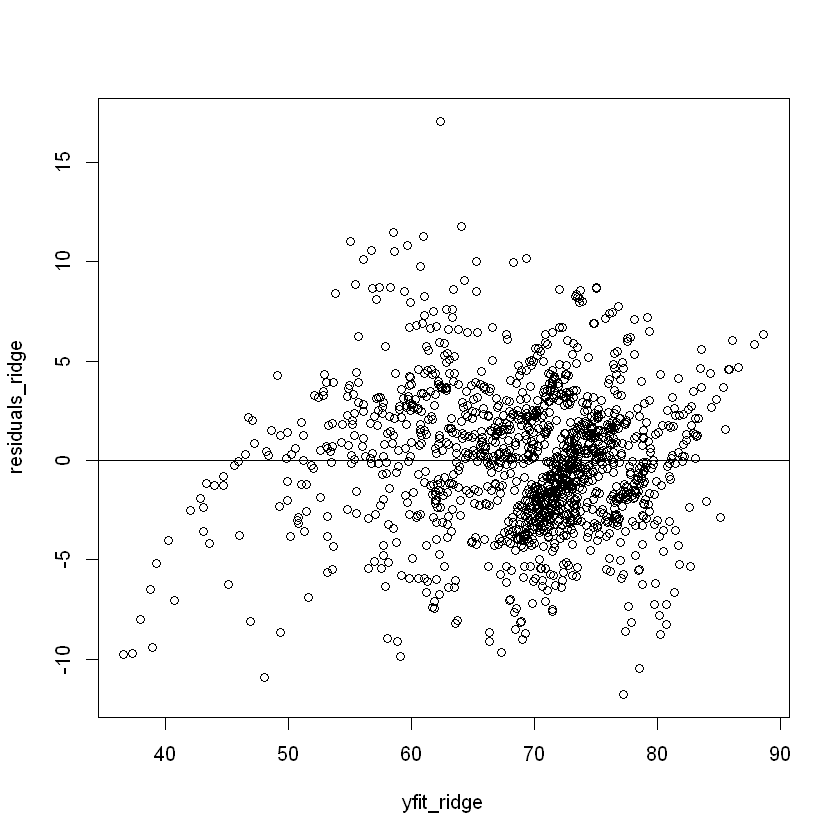

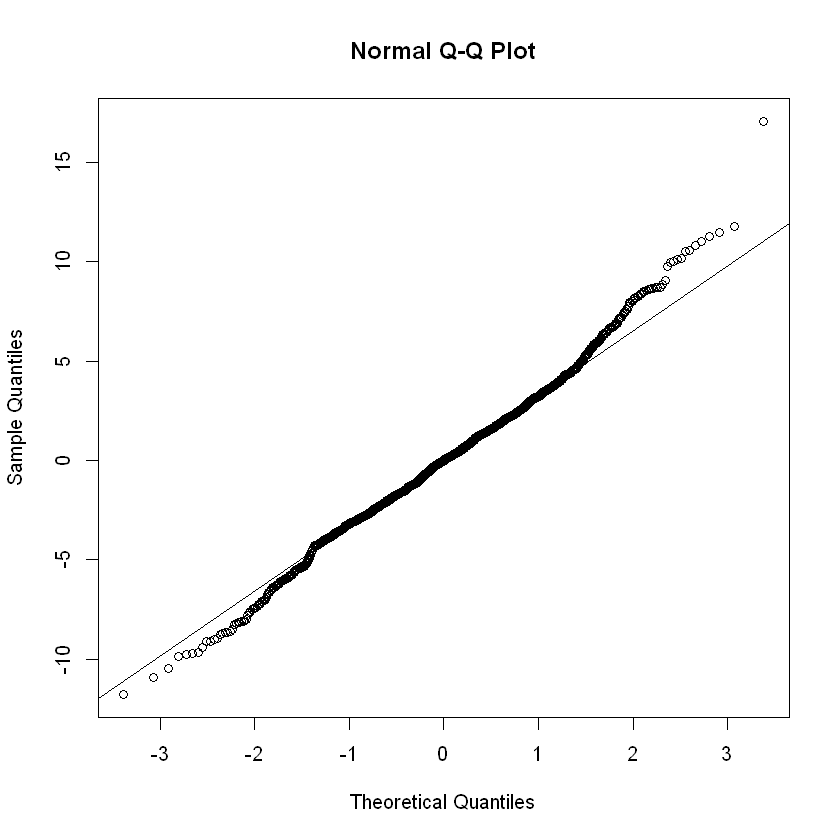

In [75]:
yfit_ridge = ridgemod$ym + scale(lifeData_train_ridge[,-c(1,2,4)], center=ridgemod$xm, scale = ridgemod$scales) %*% ridgemod$coef[,56]
residuals_ridge = yfit_ridge - lifeData_train[,4]

plot(yfit_ridge, residuals_ridge)
abline(h = 0)
qqnorm(residuals_ridge)
qqline(residuals_ridge)

# Comparison

In [ ]:
rmse <- function(x,y) sqrt(mean((x-y)^2))

In [ ]:
ypred_ls <- predict(lmod.full, lifeData_test[,-c(2,4)])
rmse(ypred_ls, lifeData_test[,4])

Warning message in predict.lm(lmod.full, lifeData_test[, -c(2, 4)]):
"prediction from a rank-deficient fit may be misleading"


[1] 2.197454

In [ ]:
# ridge
ypred_ridge = ridgemod$ym + scale(lifeData_test_ridge[,-c(1,2,4)], center=ridgemod$xm, scale = ridgemod$scales) %*% ridgemod$coef[,56]
rmse(ypred_ridge, lifeData_test[,4])

[1] 3.699274